In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-24 10:20:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.00MB/s    in 41s     

2021-04-24 10:21:18 (7.43 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile, os

In [8]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training paper pictures
train_paper_dir = os.path.join(train_dir, 'paper')

# Directory with our training rock pictures
train_rock_dir = os.path.join(train_dir, 'rock')

# Directory with our training scissors pictures
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Directory with our validation paper pictures
validation_paper_dir = os.path.join(validation_dir, 'paper')

# Directory with our validation rock pictures
validation_rock_dir = os.path.join(validation_dir, 'rock')

# Directory with our validation scissors pictures
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest', validation_split=0.4)

In [57]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [76]:
model.compile(loss='Hinge',
              optimizer=tf.optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])

In [77]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=8)

Epoch 1/5
20/20 [==============================] - 22s 1s/step - loss: 0.7204 - accuracy: 0.9659 - val_loss: 0.7326 - val_accuracy: 0.9258
Epoch 2/5
20/20 [==============================] - 21s 1s/step - loss: 0.7256 - accuracy: 0.9300 - val_loss: 0.7435 - val_accuracy: 0.8984
Epoch 3/5
20/20 [==============================] - 22s 1s/step - loss: 0.7110 - accuracy: 0.9499 - val_loss: 0.7224 - val_accuracy: 0.9297
Epoch 4/5
20/20 [==============================] - 22s 1s/step - loss: 0.7011 - accuracy: 0.9630 - val_loss: 0.7154 - val_accuracy: 0.9414
Epoch 5/5
20/20 [==============================] - 22s 1s/step - loss: 0.7045 - accuracy: 0.9579 - val_loss: 0.7275 - val_accuracy: 0.9258


Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (4).png
00nKV8oHuTGi20gq.png
rock


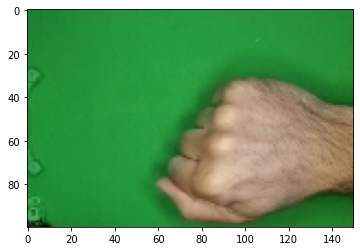

In [78]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')


Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ (3).png
04l5I8TqdzF9WDMJ.png
paper


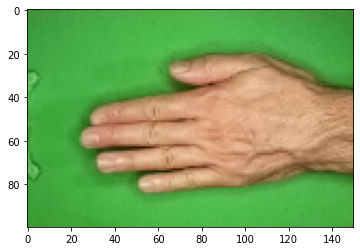

In [79]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9 (2).png
1CXgK9fgGdSRggD9.png
scissors


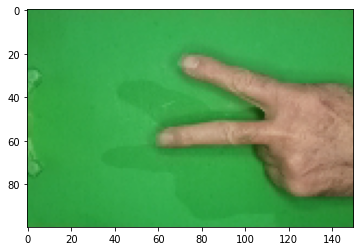

In [81]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

In [73]:
data_diri = "Andhika Agung Pratama"
print(data_diri)

Andhika Agung Pratama
